In [22]:
#Technical stock analysis in Python in talib library
#getting data from yahoofinance for AAPL
!pip install plotly
!pip install ta-lib
import yfinance as yf
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import talib
import numpy as np
from scipy.stats import norm



ticker_symbol_1 = 'AAPL'
aapl = yf.Ticker(ticker_symbol_1)
historical_data_aapl = aapl.history(period="2y")
daily_prices_aapl = historical_data_aapl[['Open', 'High', 'Low', 'Close', 'Volume']]

# Convert the index to a string format (YYYY-MM-DD)
daily_prices_aapl.index = daily_prices_aapl.index.strftime('%Y-%m-%d')
# Display the transformed data frame
print(daily_prices_aapl.head())

                  Open        High         Low       Close     Volume
Date                                                                 
2022-05-11  151.782790  153.710972  144.178816  144.861099  142689800
2022-05-12  141.172806  144.564427  137.247218  140.965149  182602000
2022-05-13  142.972451  146.443194  141.509012  145.464264  113990900
2022-05-16  143.921702  145.869664  142.567018  143.911804   86643800
2022-05-17  147.194681  148.094504  145.039061  147.570435   78336300


<IPython.core.display.Javascript object>


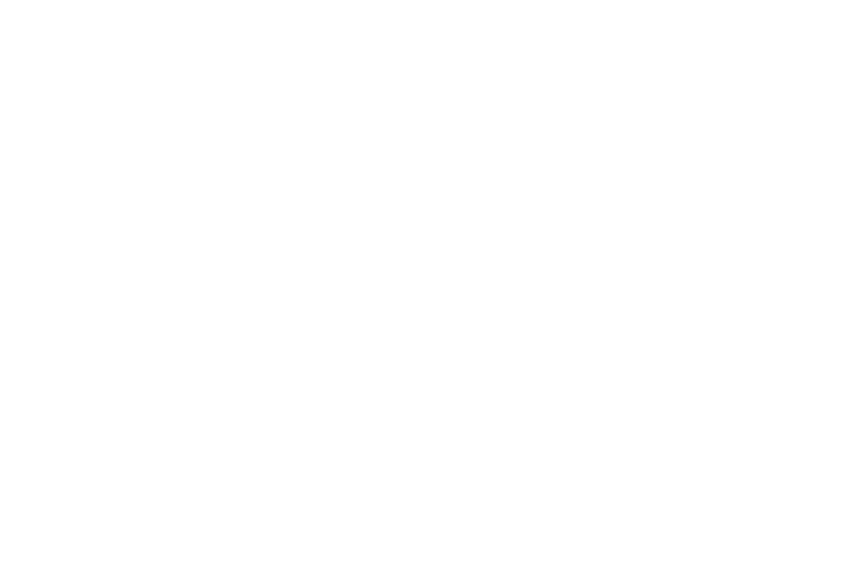

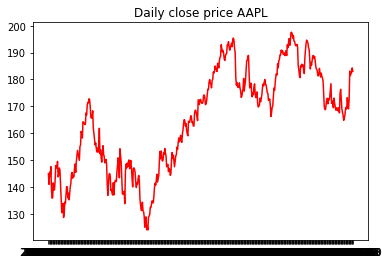

In [23]:
#Plot a timeseries chart
plt.plot(daily_prices_aapl['Close'], color='red')
plt.title("Daily close price AAPL")
plt.show()

In [24]:
#Compute daily asset returns 
daily_returns = daily_prices_aapl.pct_change()

In [25]:
#What are trading signals
#Triggers to go long or short
#commonly used in algo trading
#f.e Signal: Pice > SMA (long when the price rises above the SMA)
#signal implementing
#1) get the data and calculate the indicators
#2) define a signal based strategy (bt.algos.())
#3) create and run a backtest
#4) review the backtest result
!pip install backtrader
import backtrader as bt

In [26]:
# Define the signal-based strategy
# Print the last five rows
# Set the index as datetime index if it's not already
if not isinstance(daily_prices_aapl.index, pd.DatetimeIndex):
    daily_prices_aapl.index = pd.to_datetime(daily_prices_aapl.index)

# Define your strategy class
class AboveEMA(bt.Strategy):
    params = (
        ('sma_period', 20),
    )

    def __init__(self):
        self.sma = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.sma_period)

    def next(self):
        if self.data.close[0] > self.sma[0]:
            self.buy()

# Create a cerebro engine
cerebro = bt.Cerebro()

# Add strategy to the engine
cerebro.addstrategy(AboveEMA)

# Load your data into the engine
data = bt.feeds.PandasData(dataname=daily_prices_aapl)
cerebro.adddata(data)

# Run the strategy
cerebro.run()

In [27]:
#backtest

# Print the final portfolio value
print('Final Portfolio Value:', cerebro.broker.getvalue())

Final Portfolio Value: 11950.7844999521


<IPython.core.display.Javascript object>


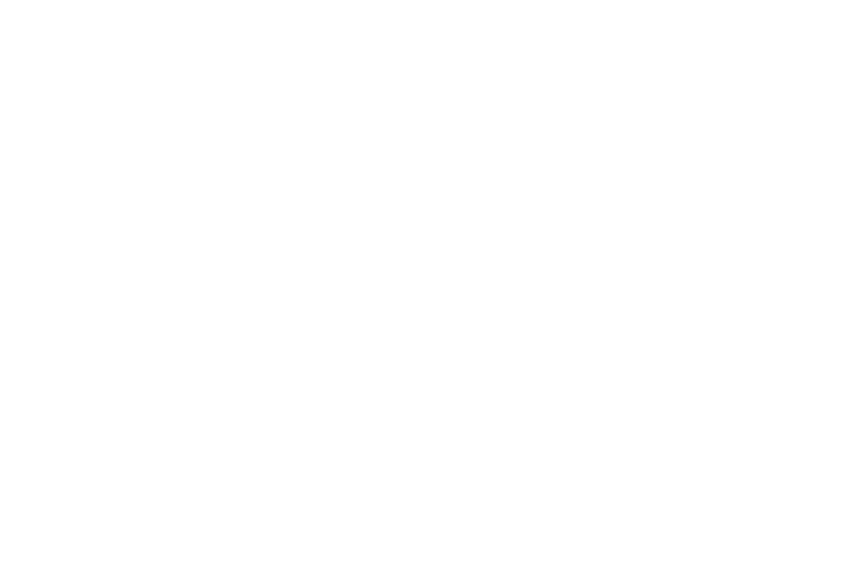

[[<Figure size 432x288 with 4 Axes>]]

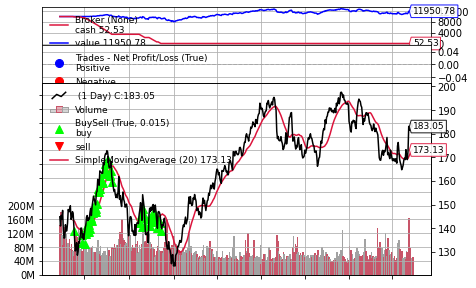

In [13]:
# Plot the backtest result
cerebro.plot()

In [28]:
#adding an analyzer
# Create a cerebro engine
cerebro = bt.Cerebro()

# Add strategy to the engine
cerebro.addstrategy(AboveEMA)

# Add analyzers
cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='mysharpe')
cerebro.addanalyzer(bt.analyzers.DrawDown, _name='mydrawdown')
cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='mytrade')

# Load your data into the engine
data = bt.feeds.PandasData(dataname=daily_prices_aapl)
cerebro.adddata(data)

# Run the strategy
cerebro.run()

# Retrieve analyzer results
sharpe_ratio = cerebro.runstrats[0][0].analyzers.mysharpe.get_analysis()
max_drawdown = cerebro.runstrats[0][0].analyzers.mydrawdown.get_analysis()
trade_stats = cerebro.runstrats[0][0].analyzers.mytrade.get_analysis()

# Print the results
print('Sharpe Ratio:', sharpe_ratio['sharperatio'])
print('Max Drawdown:', max_drawdown['max']['drawdown'])
print('Total Trades:', trade_stats['total']['total'])


Sharpe Ratio: 0.30032833928881375
Max Drawdown: 24.020788244575407
Total Trades: 1
